# 1.0 Exploratory Data Analysis

## Simple set up

In [1]:
%run 0.2-jvs-before_to_start.ipynb

## Import libraries

In [2]:
import janitor
import pandas_profiling
import titanic_platzi.visualization.visualize

import pandas as pd
import seaborn as sns
import numpy as np
import pandas_flavor as pf
import matplotlib.pyplot as plt

from IPython.display import display

## Load data

In [3]:
titanic_dfs = {
    f"titanic_{file.stem}_df": pd.read_csv(filepath_or_buffer=file)
    for file in data_raw_dir().glob("*.csv")
}

# for df_name, df in titanic_dfs.items():
#     display(df_name, df.head(2))
#     del df_name, df

[display(df_name, df.head(2)) for df_name, df in titanic_dfs.items()];    

'titanic_test_df'

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

'titanic_train_df'

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

'titanic_gender_submission_df'

PassengerId  Survived
0          892         0
1          893         1

## Clean column names

In [4]:
titanic_dfs = {
    df_name: df.clean_names(case_type="snake")
    for df_name, df in 
    titanic_dfs.items()
}

[display(df_name, df.head(2)) for df_name, df in titanic_dfs.items()];  

'titanic_test_df'

passenger_id  pclass                              name     sex   age  \
0           892       3                  Kelly, Mr. James    male  34.5   
1           893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0   

   sib_sp  parch  ticket    fare cabin embarked  
0       0      0  330911  7.8292   NaN        Q  
1       1      0  363272  7.0000   NaN        S

'titanic_train_df'

passenger_id  survived  pclass  \
0             1         0       3   
1             2         1       1   

                                                name     sex   age  sib_sp  \
0                            Braund, Mr. Owen Harris    male  22.0       1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0       1   

   parch     ticket     fare cabin embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

'titanic_gender_submission_df'

passenger_id  survived
0           892         0
1           893         1

## Generate profile reports

In [5]:
profiling_dir = reports_dir("profiling")
profiling_dir.mkdir(exist_ok=True)

In [6]:
%%capture
{
    df_name: (
        df
        .profile_report(
            explorative=True,
            title="Pandas Profiling Report of: {df_name}"
        )
        .to_file(profiling_dir.joinpath(f"{df_name}.html"))
    )
    for df_name, df in titanic_dfs.items()
}

## Allow to access data frames as locals

In [7]:
locals().update(titanic_dfs)
# del titanic_dfs

## Set plot defaults

In [8]:
sns.set_style("whitegrid")

## All vs All

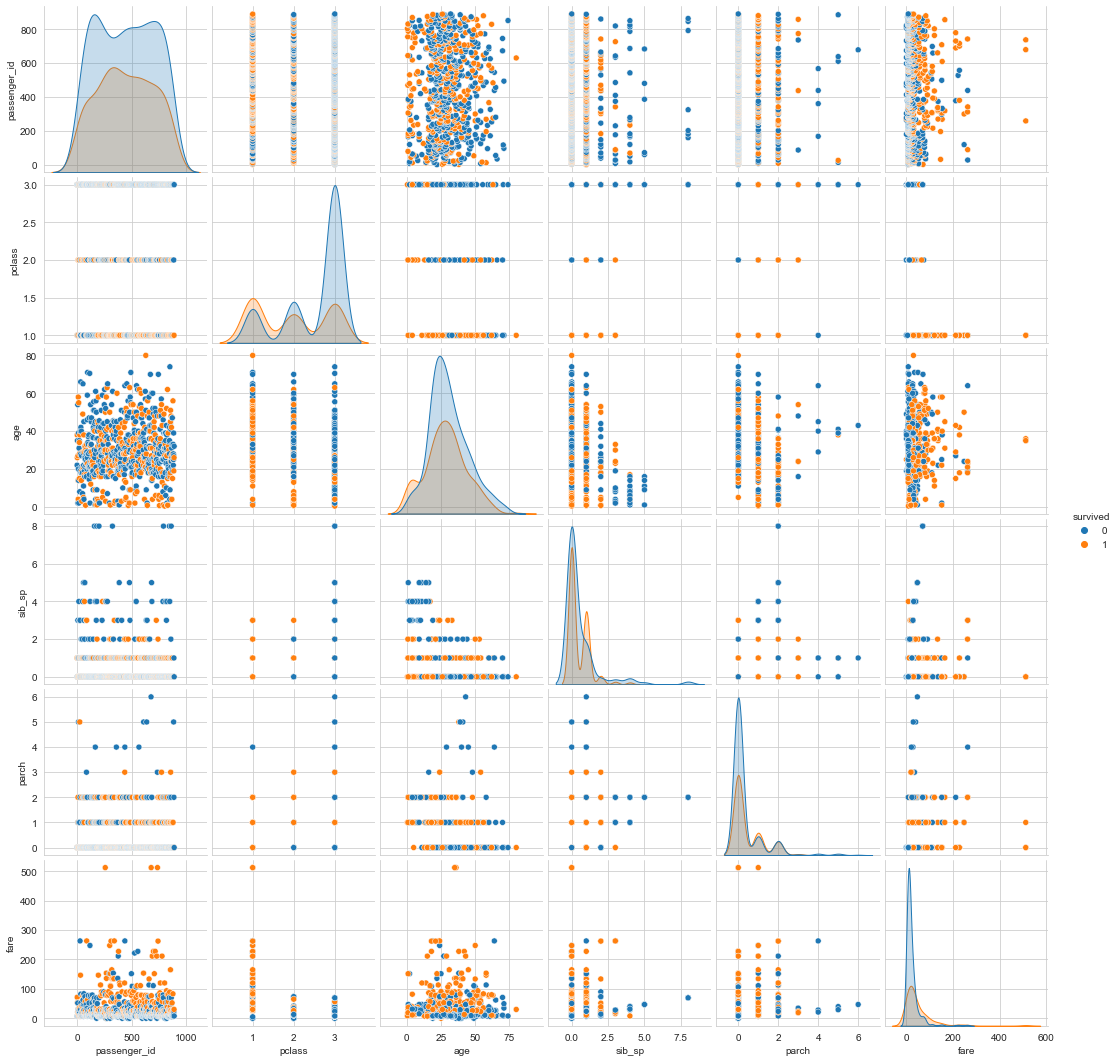

In [9]:
sns.pairplot(titanic_train_df, hue="survived")
#sns.pairplot(titanic_train_df, hue="sex")

## Effect of Age and Sex in Survival

### EDA plot

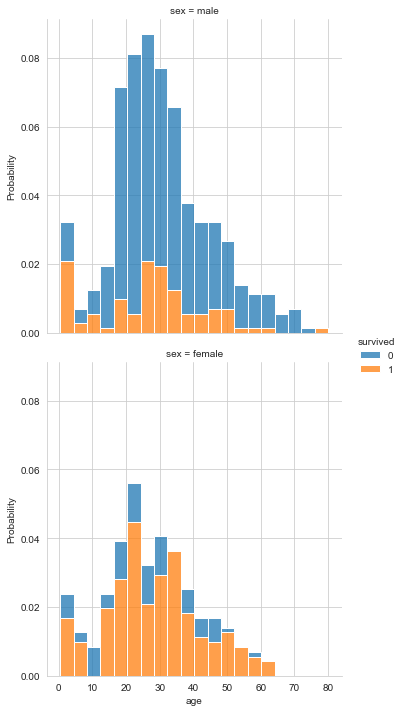

In [10]:
p_1 = (
    titanic_train_df
    #.filter_on("age >= 0")
    .pipe(
        lambda df:
        sns.displot(
            data=df,
            x="age",
            row="sex",
            #col="pclass",
            hue="survived",
            kind="hist",
            multiple="stack",
            stat="probability"
        )
    )
);

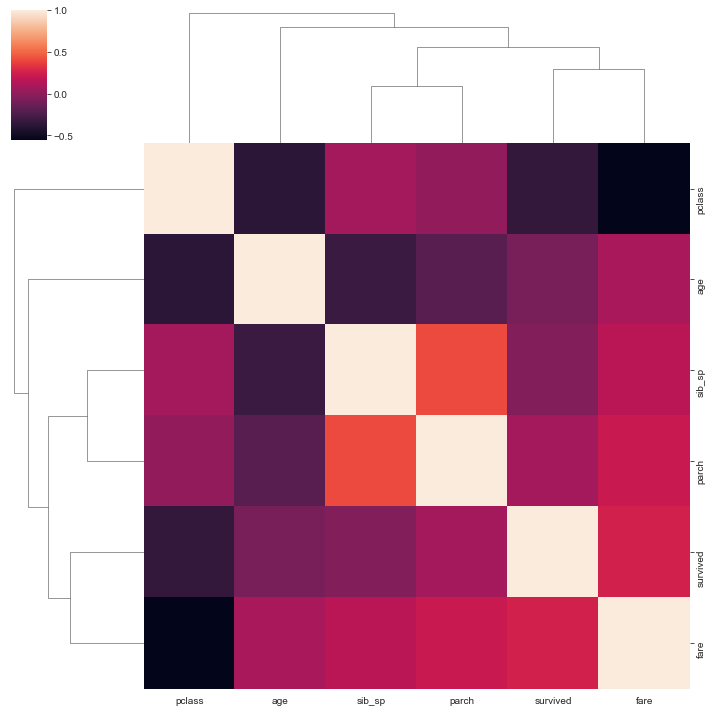

In [11]:
(
    titanic_train_df
    .select_columns(["passenger_id"], invert=True)
    .corr()
    .pipe(
        lambda df:
        sns.clustermap(df)
    )
);

### Story telling plot

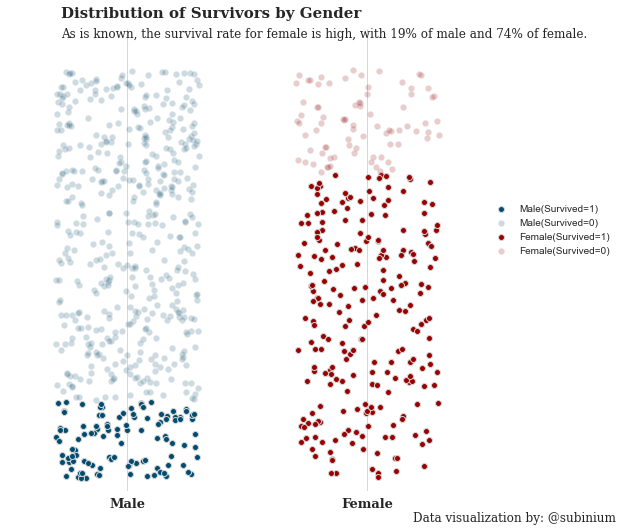

In [12]:
titanic_train_df.story_telling_plot()